In [294]:
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
import pandas as pd
import csv
from mpl_toolkits.mplot3d import Axes3D
#sys.path.insert(0, r'/Users/nenetto/Dev/BiiGTK/src/PythonTools')
%matplotlib inline

frame: Details frame of exported data in the following format:

1. Frame Index (integer) 
2. Time Stamp (double) in seconds
3. Trackable Count (integer) number of trackables tracked in current frame
4. ID
5. x
6. y
7. z
8. qx
9. qy
10. qz
11. qw
12. yaw
13. pitch
14. roll
15. Marker Count (integer) Count of all visibile markers in frame"
16. Marker Detail >for each reconstructed 3d marker< (x,y,z,id)

In [295]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
flex_lat_file = 'J:/Dev/AlgiaCervical/DataTest/flexion-lateral.csv'
flex_ext_file = 'J:/Dev/AlgiaCervical/DataTest/flexo-extension.csv'

def getMatrixOptitrack(x, y, z, qx, qy, qz, qw):
    
    R = np.eye(4)
    R[0, 0] = -2 * qy*qy - 2 * qz*qz + 1
    R[0, 1] = 2 * qw*qz + 2 * qx*qy
    R[0, 2] = 2 * qw*qy - 2 * qx*qz
    R[0, 3] = x

    R[1, 0] = 2 * qx*qy - 2 * qw*qz
    R[1, 1] = -2 * qx*qx - 2 * qz*qz + 1
    R[1, 2] = -2 * qw*qx - 2 * qy*qz
    R[1, 3] = y

    R[2, 0] = -2 * qw*qy - 2 * qx*qz
    R[2, 1] = 2 * qw*qx - 2 * qy*qz
    R[2, 2] = -2 * qx*qx - 2 * qy*qy + 1
    R[2, 3] = z

    R[3, 0] = 0.0
    R[3, 1] = 0.0
    R[3, 2] = 0.0
    R[3, 3] = 1.0
    return R


def getDataFromCSVTrackingTools(myfilename):
    data = []
    with open(myfilename, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if row[0] == 'frame':
                data.append({
                            'time':float(row[2]),\
                            'id':float(row[4]),\
                            'x':float(row[5])*1000,\
                            'y':float(row[6])*1000,\
                            'z':float(row[7])*1000,\
                            'qx':float(row[8]),\
                            'qy':float(row[9]),\
                            'qz':float(row[10]),\
                            'qw':float(row[11])\
                    })

    df = pd.DataFrame(data)
    return df


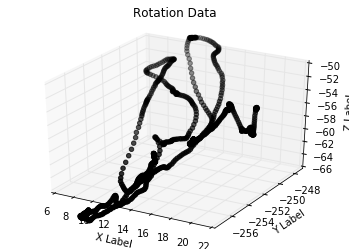

,id,qw,qx,qy,qz,time,x,y,z
0,1,0.626845,-0.165220,0.433516,-0.625964,0.026166,13.72269,-255.14588,-60.07137
1,1,0.626847,-0.165356,0.433433,-0.625984,0.036105,13.72883,-255.14627,-60.08019
2,1,0.626874,-0.165317,0.433353,-0.626023,0.046114,13.73521,-255.15610,-60.07954
3,1,0.626848,-0.165310,0.433378,-0.626033,0.056128,13.73911,-255.16105,-60.08875
4,1,0.626871,-0.165327,0.433320,-0.626046,0.066043,13.73487,-255.15881,-60.09486


In [3]:
df = getDataFromCSVTrackingTools(rotation_file)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.x, df.y, df.z, c='black', marker='o')

ax.axis('equal')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')

plt.show()
df.head(5)

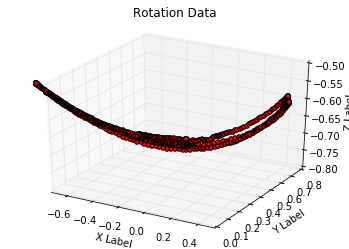

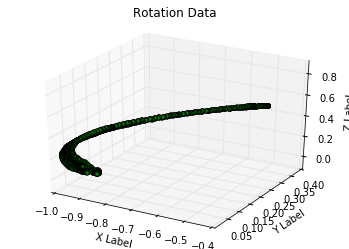

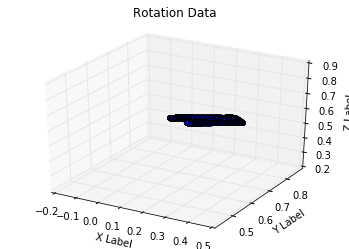

In [4]:
pointx = np.array([1, 0, 0, 1])
pointy = np.array([0, 1, 0, 1])
pointz = np.array([0, 0, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointx)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='r', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointy)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='g', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointz)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

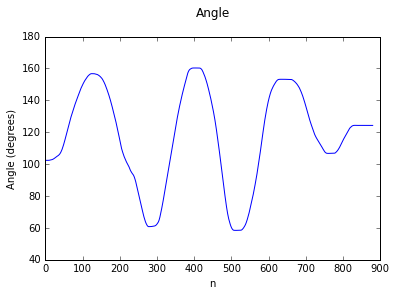

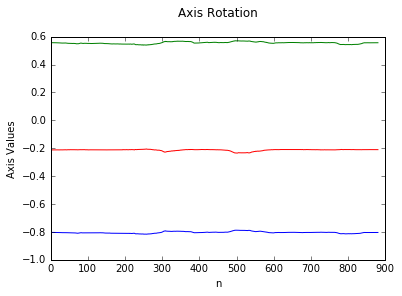

Axis Rotation Median  [-0.21114064  0.55572594 -0.80434458]
Axis Rotation Mean  [-0.21321643  0.55472439 -0.80417214]


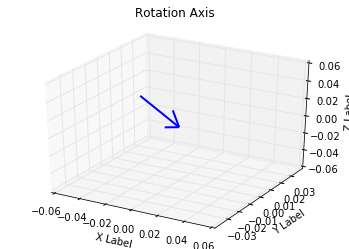

In [5]:

# Quaternion q = cos(a/2) + (ni+nj+nk)*sin (a/2)

# Get the angles

angles = 2 * np.arccos(df.qw.values)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.degrees(angles))
ax.set_xlabel('n')
ax.set_ylabel('Angle (degrees)')
ax.set_title('Angle\n')

plt.show() 


# Extract the axis of rotation

ix = df.qx.values / np.sin(angles/2)
iy = df.qy.values / np.sin(angles/2)
iz = df.qz.values / np.sin(angles/2)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ix,'r')
ax.plot(iy,'g')
ax.plot(iz,'b')
ax.set_xlabel('n')
ax.set_ylabel('Axis Values')
ax.set_title('Axis Rotation\n')

plt.show() 

# For this rotation we extract the mean axis of rotation as

AxisRotationMedian = np.array([np.median(ix),np.median(iy),np.median(iz)])
AxisRotationMean = np.array([np.mean(ix),np.mean(iy),np.mean(iz)])


print 'Axis Rotation Median ', AxisRotationMedian
print 'Axis Rotation Mean ', AxisRotationMean


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0, AxisRotationMedian[0], AxisRotationMedian[1], AxisRotationMedian[2], length=0.1, cmap='Reds', lw=2)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Axis\n')

plt.show() 


[ 0.19278872 -0.53700354  0.82125496]
[ 0.19278872 -0.53700354  0.82125496]
[-0.53250725 -0.46916846  0.70449768]
[-0.9157407   0.2578254   0.30813153]
[-0.9157407   0.2578254   0.30813153]
[-0.45155225 -0.56949911  0.68685612]
[-0.59177526  0.58275683  0.55695289]
[-0.59177526  0.58275683  0.55695289]
[-0.53295276 -0.3353775   0.77684187]


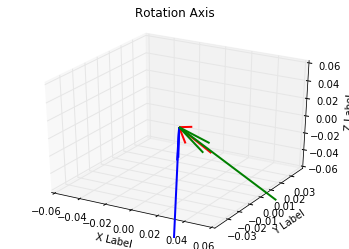

Axis Rotation  [ 0.21186248 -0.55636585  0.80347454]
Axis Flex Lat  [-0.89415211  0.20317761  0.39901237]
Axis Flex Ext  [-0.31605456  0.40978779  0.8556772 ]


In [143]:
# Complete Calibration Process and extraction of triedron of head


def getAxisRotation(dfData):
    ## Rotation Data
    pointX     = np.array([1, 0, 0, 1])
    pointY     = np.array([0, 1, 0, 1])
    pointZ     = np.array([0, 0, 1, 1])
    
    
    N = len(dfData.index)

    # Rotate x vector using rotation information 
    pointsX = np.zeros((N,3))
    pointsY = np.zeros((N,3))
    pointsZ = np.zeros((N,3))

    for i in range(N):
        R = getMatrixOptitrack(0,0,0,dfData['qx'].loc[i],dfData['qy'].loc[i],dfData['qz'].loc[i],dfData['qw'].loc[i])
        pointsX[i,:] = np.dot(R,pointX)[0:3]
        pointsY[i,:] = np.dot(R,pointY)[0:3]
        pointsZ[i,:] = np.dot(R,pointZ)[0:3]

    # Center the points
    pointsX = pointsX - np.tile(np.mean(pointsX, axis = 0), (N,1))
    pointsY = pointsY - np.tile(np.mean(pointsY, axis = 0), (N,1))
    pointsZ = pointsZ - np.tile(np.mean(pointsZ, axis = 0), (N,1))
    
    # Fit points to a plane and get norm vector

    A = np.concatenate((pointsX[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsX[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisRotationX = np.array([x[0], x[1], 1.0])
    AxisRotationX = AxisRotationX/np.linalg.norm(AxisRotationX)
    
    A = np.concatenate((pointsX[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsX[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisRotationY = np.array([x[0], x[1], 1.0])
    AxisRotationY = AxisRotationY/np.linalg.norm(AxisRotationY)
    
    
    A = np.concatenate((pointsZ[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsX[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisRotationZ = np.array([x[0], x[1], 1.0])
    AxisRotationZ = AxisRotationZ/np.linalg.norm(AxisRotationZ)
    
    print AxisRotationX
    print AxisRotationY
    print AxisRotationZ
    
    


def CalibrateHead(rotation_file, flex_lat_file, flex_ext_file, plotme = True):
    # Read three files
    rotDF = getDataFromCSVTrackingTools(rotation_file)
    flexLatDF = getDataFromCSVTrackingTools(flex_lat_file)
    flexExtDF = getDataFromCSVTrackingTools(flex_ext_file)
    
    
    
    getAxisRotation(rotDF)
    getAxisRotation(flexLatDF)
    getAxisRotation(flexExtDF)
    #######################
    # Axis for Rotation
    #######################
    
    ## Rotation Data
    pointRot     = np.array([0, 0, 1, 1])
    N = len(rotDF.index)

    # Rotate x vector using rotation information 
    pointsRot = np.zeros((N,3))

    for i in range(N):
        R = getMatrixOptitrack(0,0,0,rotDF['qx'].loc[i],rotDF['qy'].loc[i],rotDF['qz'].loc[i],rotDF['qw'].loc[i])
        pointsRot[i,:] = np.dot(R,pointRot)[0:3]

    # Center the points
    pointsRot = pointsRot - np.tile(np.mean(pointsRot, axis = 0), (N,1))
    
    # Fit points to a plane and get norm vector

    A = np.concatenate((pointsRot[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsRot[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisRotation = np.array([x[0], x[1], 1.0])
    AxisRotation = AxisRotation/np.linalg.norm(AxisRotation)

    #######################
    # Axis for Flex Lateral
    #######################
    
    ## Rotation Data
    pointFlexLat = np.array([0, 1, 0, 1])
    N = len(flexLatDF.index)

    # Rotate x vector using rotation information 
    pointsFlexLat = np.zeros((N,3))

    for i in range(N):
        R = getMatrixOptitrack(0,0,0,flexLatDF['qx'].loc[i],flexLatDF['qy'].loc[i],flexLatDF['qz'].loc[i],flexLatDF['qw'].loc[i])
        pointsFlexLat[i,:] = np.dot(R,pointFlexLat)[0:3]

    # Center the points
    pointsFlexLat = pointsFlexLat - np.tile(np.mean(pointsFlexLat, axis = 0), (N,1))
        
    # Fit points to a plane and get norm vector

    A = np.concatenate((pointsFlexLat[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsFlexLat[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisFlexLat= np.array([x[0], x[1], 1.0])
    AxisFlexLat = AxisFlexLat/np.linalg.norm(AxisFlexLat)
    
    #######################
    # Axis for Flex Extensión
    #######################
    
    ## Rotation Data
    pointExt = np.array([0, 0, 1, 1])
    N = len(flexExtDF.index)
    
    # Rotate x vector using rotation information 
    pointsExt = np.zeros((N,3))

    for i in range(N):
        R = getMatrixOptitrack(0,0,0,flexExtDF['qx'].loc[i],flexExtDF['qy'].loc[i],flexExtDF['qz'].loc[i],flexExtDF['qw'].loc[i])
        pointsExt[i,:] = np.dot(R,pointExt)[0:3]

    # Center the points
    pointsExt = pointsExt - np.tile(np.mean(pointsExt, axis = 0),(N,1))
        
    # Fit points to a plane and get norm vector

    A = np.concatenate((pointsExt[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsExt[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisExt= np.array([x[0], x[1], 1.0])
    AxisExt = AxisExt/np.linalg.norm(AxisExt)
    
    
    
    
    
    if plotme == True:
                 
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.axis('equal')

        ax.quiver(0,0,0, AxisRotation[0], AxisRotation[1], AxisRotation[2], length=0.1, lw=2, color = 'r')
        ax.quiver(0,0,0, AxisFlexLat[0], AxisFlexLat[1], AxisFlexLat[2], length = 0.1, lw=2, color = 'g')
        ax.quiver(0,0,0, AxisExt[0], AxisExt[1], AxisExt[2], length = 0.1, lw=2, color = 'b')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        
        ax.set_title('Rotation Axis\n')

        plt.show() 
        
        print 'Axis Rotation ', AxisRotation
        print 'Axis Flex Lat ', AxisFlexLat
        print 'Axis Flex Ext ', AxisExt
        
        return AxisRotation, AxisFlexLat, AxisExt
        
        
AxisRotation, AxisFlexLat, AxisExt = CalibrateHead(rotation_file, flex_lat_file, flex_ext_file)

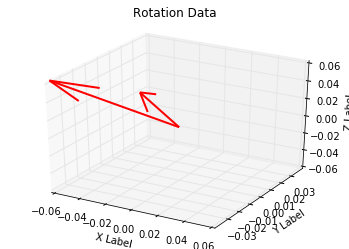

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')

ax.quiver(0,0,0,0.19278872, -0.53700354,  0.82125496, length=0.1,color = 'r', lw=2, pivot='tail')
ax.quiver(0,0,0,-0.53250725, -0.46916846,  0.70449768, length=0.1,color = 'r', lw=2, pivot='tail')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')
plt.show() 

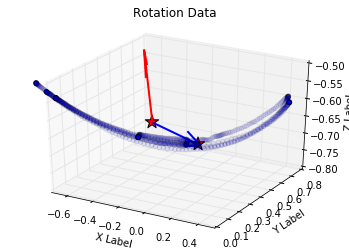

,id,qw,qx,qy,qz,time,x,y,z
0,1,0.971041,0.138412,-0.134964,-0.140378,0.006664,27.83099,-84.57482,-62.46204
1,1,0.971049,0.138295,-0.134942,-0.140457,0.016729,27.90022,-84.57757,-62.41366
2,1,0.971020,0.138582,-0.134738,-0.140570,0.026701,27.95325,-84.57042,-62.36655
3,1,0.971053,0.138149,-0.134915,-0.140602,0.036720,27.99494,-84.60532,-62.30951
4,1,0.971084,0.138067,-0.134755,-0.140619,0.046648,28.00669,-84.64346,-62.24570
5,1,0.971179,0.137762,-0.134500,-0.140508,0.056747,27.98818,-84.69260,-62.20177
6,1,0.971313,0.137495,-0.134055,-0.140272,0.066772,27.93724,-84.77318,-62.15182
7,1,0.971506,0.137391,-0.133213,-0.139833,0.076716,27.83798,-84.88495,-62.06559
8,1,0.971910,0.136344,-0.132177,-0.139033,0.086672,27.69715,-85.05239,-62.00778
9,1,0.972253,0.135377,-0.131467,-0.138249,0.096680,27.47645,-85.25745,-61.97878


In [293]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
flex_lat_file = 'J:/Dev/AlgiaCervical/DataTest/flexion-lateral.csv'
flex_ext_file = 'J:/Dev/AlgiaCervical/DataTest/flexo-extension.csv'

RotDF = getDataFromCSVTrackingTools(flex_ext_file)

pointRot     = np.array([1, 0, 0, 1])


## Rotation Data
N = len(rotDF.index)

# Rotate x vector using rotation information 
pointsRot = np.zeros((N,3))

for i in range(N):
    R = getMatrixOptitrack(0,0,0,rotDF['qx'].loc[i],rotDF['qy'].loc[i],rotDF['qz'].loc[i],rotDF['qw'].loc[i])
    pmov = np.dot(R,pointRot)
    pointsRot[i,:] = np.dot(R,pointRot)[0:3]

    
meanPoint = np.mean(pointsRot, axis = 0)
    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')
ax.scatter(pointsRot[:,0],pointsRot[:,1],pointsRot[:,2], c='b', marker='o', alpha = 0.1)
ax.scatter(meanPoint[0],meanPoint[1],meanPoint[2], c='r', marker='*', s=200)
ax.scatter(pointsRot[0,0],pointsRot[0,1],pointsRot[0,2], c='r', marker='*', s=200)
ax.quiver(meanPoint[0],meanPoint[1],meanPoint[2],pointsRot[0,0]-meanPoint[0],pointsRot[0,1]-meanPoint[1],pointsRot[0,2]-meanPoint[2], length=0.3, cmap='Reds', lw=2, pivot='tail')
ax.quiver(meanPoint[0],meanPoint[1],meanPoint[2],AxisRotation[0]-meanPoint[0],AxisRotation[1]-meanPoint[1],AxisRotation[2]-meanPoint[2], length=0.3, color='r', lw=2, pivot='tail')


plt.axis('tight')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')
plt.axis('equal')
plt.show() 

RotDF


## Extracting rotations for each movement

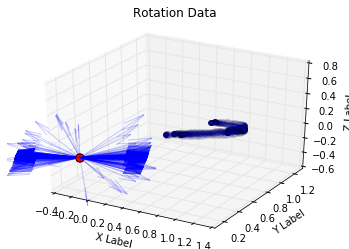

In [164]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
df = getDataFromCSVTrackingTools(rotation_file)

# Number of points
N = len(df.index)

point  = np.array([1, 1, 0, 1])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')

for i in range(N-1):
    Ti = getMatrixOptitrack(0,0,0,df['qx'].loc[0],df['qy'].loc[0],df['qz'].loc[0],df['qw'].loc[0])
    Tii = getMatrixOptitrack(0,0,0,df['qx'].loc[i+1],df['qy'].loc[i+1],df['qz'].loc[i+1],df['qw'].loc[i+1])
    Ti_inv = np.linalg.inv(Ti)
    
    Gii = np.dot(Tii,Ti_inv)
    
    w, v = np.linalg.eig(Gii)
    RotationAxis = np.real(v[:,0])
    
    ax.quiver(0,0,0,RotationAxis[0],RotationAxis[1],RotationAxis[2], length=0.7, cmap='Reds', lw=1, pivot='tail', alpha = 0.2)

    pmov = np.dot(Gii,point)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o', alpha = 0.1)
    plt.axis('tight')
    
ax.scatter(0,0,0, c='r', marker='o', alpha = 1.0, s=70)
plt.axis('tight')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')
plt.axis('equal')
plt.show() 


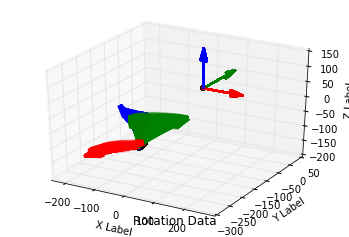

In [285]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
df = getDataFromCSVTrackingTools(rotation_file)

# Number of points
N = len(df.index)

# Draw axis

def drawAxis(axisMatrix,center):
       
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(center[0],center[1],center[2], c='b', marker='o', alpha = 1)
    
    sizeVectors = np.linalg.norm(center)/2.0
    
    axisMatrixRotated = axisMatrix #- np.tile(center[0:3],(3,1))
    
    ax.quiver(center[0],center[1],center[2],axisMatrixRotated[0,0],axisMatrixRotated[0,1],axisMatrixRotated[0,2], length=sizeVectors, color = 'r', lw=2, pivot='tail', alpha = 1.0)
    ax.quiver(center[0],center[1],center[2],axisMatrixRotated[1,0],axisMatrixRotated[1,1],axisMatrixRotated[1,2], length=sizeVectors, color = 'g', lw=2, pivot='tail', alpha = 1.0)
    ax.quiver(center[0],center[1],center[2],axisMatrixRotated[2,0],axisMatrixRotated[2,1],axisMatrixRotated[2,2], length=sizeVectors, color = 'b', lw=2, pivot='tail', alpha = 1.0)
    
    ax.scatter(0,0,0, c='r', marker='o', alpha = 0.2)
    ax.quiver(0,0,0,1,0,0, length=sizeVectors, color = 'r', lw=2, pivot='tail', alpha = 0.2)
    ax.quiver(0,0,0,0,1,0, length=sizeVectors, color = 'g', lw=2, pivot='tail', alpha = 0.2)
    ax.quiver(0,0,0,0,0,1, length=sizeVectors, color = 'b', lw=2, pivot='tail', alpha = 0.2)
    
    
    # Create cubic bounding box to simulate equal aspect ratio
    
    max_range = np.array([np.array([0,center[0]]).max()-np.array([0,center[0]]).min(),\
                          np.array([0,center[1]]).max()-np.array([0,center[1]]).min(),\
                          np.array([0,center[2]]).max()-np.array([0,center[2]]).min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(center[0])
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(center[1])
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(center[2])
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')
    
    # Labelling
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('Rotation Data\n')
    plt.axis('equal')
    plt.show() 

    
def getMatrixOptitrackFromDF(df,i):
    return getMatrixOptitrack(df['x'].loc[i],df['y'].loc[i],df['z'].loc[i],df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    
    
def drawAxis2(axisMatrix,center):
       
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    ax.scatter(center[0],center[1],center[2], c='b', marker='o', alpha = 1)
    
    sizeVectors = np.linalg.norm(center)/2.0
    
    axisMatrixRotated = axisMatrix #- np.tile(center[0:3],(3,1))
    
    ax.quiver(center[0],center[1],center[2],\
              axisMatrixRotated[0,0],axisMatrixRotated[0,1],axisMatrixRotated[0,2],\
              length=sizeVectors, color = 'r', lw=2, pivot='tail', alpha = 0.2)
    ax.quiver(center[0],center[1],center[2],\
              axisMatrixRotated[1,0],axisMatrixRotated[1,1],axisMatrixRotated[1,2],\
              length=sizeVectors, color = 'g', lw=2, pivot='tail', alpha = 0.2)
    ax.quiver(center[0],center[1],center[2],\
              axisMatrixRotated[2,0],axisMatrixRotated[2,1],axisMatrixRotated[2,2],\
              length=sizeVectors, color = 'b', lw=2, pivot='tail', alpha = 0.2)
    
    ax.scatter(0,0,0, c='r', marker='o', alpha = 0.2)
    ax.quiver(0,0,0,1,0,0, length=sizeVectors, color = 'r', lw=2, pivot='tail', alpha = 0.1)
    ax.quiver(0,0,0,0,1,0, length=sizeVectors, color = 'g', lw=2, pivot='tail', alpha = 0.1)
    ax.quiver(0,0,0,0,0,1, length=sizeVectors, color = 'b', lw=2, pivot='tail', alpha = 0.1)
    
    
    # Create cubic bounding box to simulate equal aspect ratio
    
    max_range = np.array([np.array([0,center[0]]).max()-np.array([0,center[0]]).min(),\
                          np.array([0,center[1]]).max()-np.array([0,center[1]]).min(),\
                          np.array([0,center[2]]).max()-np.array([0,center[2]]).min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(center[0])
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(center[1])
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(center[2])
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')
    
    # Labelling
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('Rotation Data')
    #plt.axis('equal')
    #plt.show()  
    
    
    
# Some test
    
'''  
axisOrigin = np.eye(3)
centerOrigin = np.array([0,0,0])

T0 = getMatrixOptitrackFromDF(df,0)
drawAxis(T0[0:3,0:3],T0[:,3])

T1 = getMatrixOptitrackFromDF(df,1)
drawAxis(T1[0:3,0:3],T1[:,3])

G1= np.dot(T1,np.linalg.inv(T0))
drawAxis(G1[0:3,0:3],G1[:,3])
'''

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in np.arange(0,N,1):
    T0 = getMatrixOptitrackFromDF(df,i)
    drawAxis2(T0[0:3,0:3],T0[:,3])

plt.axis('equal')
plt.show() 



# PCA approximation

## Theory

The angle will be extracted by a system calibration:
1. The user will move the head **only** in the rotation (lateral flex, extension flex) direction
2. Only euler angles from the original coordinate system will be extracted from the calibration data
3. Using PCA, the angle combination of maximum variance will be consider the angle that match the orginal direction
4. The first data will be set to zero for the right (up) - left (down) directions.

### Read the data and extract the euler angles

In [305]:
import math

def decompose_matrix(matrix):
    """Return sequence of transformations from transformation matrix.

    matrix : array_like
        Non-degenerative homogeneous transformation matrix

    Return tuple of:
        scale : vector of 3 scaling factors
        shear : list of shear factors for x-y, x-z, y-z axes
        angles : list of Euler angles about static x, y, z axes
        translate : translation vector along x, y, z axes
        perspective : perspective partition of matrix

    Raise ValueError if matrix is of wrong type or degenerative.

    """
    M = np.array(matrix, dtype=np.float64, copy=True).T
    if abs(M[3, 3]) < np.finfo(float).eps:
        raise ValueError("M[3, 3] is zero")
    M /= M[3, 3]
    P = M.copy()
    P[:, 3] = 0.0, 0.0, 0.0, 1.0
    if not np.linalg.det(P):
        raise ValueError("matrix is singular")

    scale = np.zeros((3, ))
    shear = [0.0, 0.0, 0.0]
    angles = [0.0, 0.0, 0.0]

    if any(abs(M[:3, 3]) > np.finfo(float).eps):
        perspective = np.dot(M[:, 3], np.linalg.inv(P.T))
        M[:, 3] = 0.0, 0.0, 0.0, 1.0
    else:
        perspective = np.array([0.0, 0.0, 0.0, 1.0])

    translate = M[3, :3].copy()
    M[3, :3] = 0.0

    row = M[:3, :3].copy()
    scale[0] = vector_norm(row[0])
    row[0] /= scale[0]
    shear[0] = np.dot(row[0], row[1])
    row[1] -= row[0] * shear[0]
    scale[1] = vector_norm(row[1])
    row[1] /= scale[1]
    shear[0] /= scale[1]
    shear[1] = np.dot(row[0], row[2])
    row[2] -= row[0] * shear[1]
    shear[2] = np.dot(row[1], row[2])
    row[2] -= row[1] * shear[2]
    scale[2] = vector_norm(row[2])
    row[2] /= scale[2]
    shear[1:] /= scale[2]

    if np.dot(row[0], np.cross(row[1], row[2])) < 0:
        np.negative(scale, scale)
        np.negative(row, row)

    angles[1] = math.asin(-row[0, 2])
    if math.cos(angles[1]):
        angles[0] = math.atan2(row[1, 2], row[2, 2])
        angles[2] = math.atan2(row[0, 1], row[0, 0])
    else:
        #angles[0] = math.atan2(row[1, 0], row[1, 1])
        angles[0] = math.atan2(-row[2, 1], row[1, 1])
        angles[2] = 0.0

    return scale, shear, angles, translate, perspective

def vector_norm(data, axis=None, out=None):
    """Return length, i.e. Euclidean norm, of ndarray along axis.

    """
    data = np.array(data, dtype=np.float64, copy=True)
    if out is None:
        if data.ndim == 1:
            return math.sqrt(np.dot(data, data))
        data *= data
        out = numpy.atleast_1d(np.sum(data, axis=axis))
        np.sqrt(out, out)
        return out
    else:
        data *= data
        np.sum(data, axis=axis, out=out)
        np.sqrt(out, out)
        
def getMatrixOptitrackFromDF(df,i):
    return getMatrixOptitrack(df['x'].loc[i],df['y'].loc[i],df['z'].loc[i],df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    

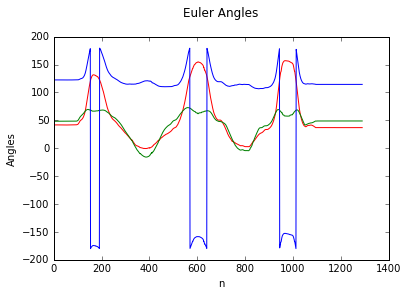

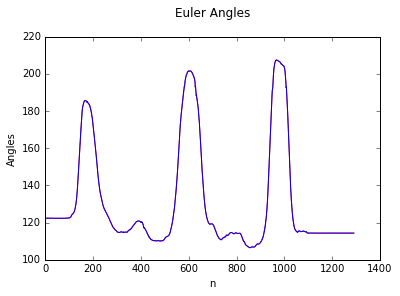

In [369]:


rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
df = getDataFromCSVTrackingTools(flex_lat_file)

# Number of points
N = len(df.index)

eulerAng = np.zeros((N,3))

for i in np.arange(0,N,1):
    Ti = getMatrixOptitrackFromDF(df,i)
    scale, shear, angles, translate, perspective = decompose_matrix(Ti)
    eulerAng[i,0] = np.degrees(angles[0])
    eulerAng[i,1] = np.degrees(angles[1])
    eulerAng[i,2] = np.degrees(angles[2])
    
    
    
    
    
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eulerAng[:,0],'r')
ax.plot(eulerAng[:,1],'g')
ax.plot(eulerAng[:,2],'b')
ax.set_xlabel('n')
ax.set_ylabel('Angles')
ax.set_title('Euler Angles\n')

plt.show() 






def correctAngle(data):

    prev = data[0]
    thr = np.mean(np.diff(data)) + 3*np.std(np.diff(data))
    
    sign = 1
    for i in np.arange(1,len(data),1):

        dif_it = np.abs(data[i] - prev)
        
        prev = data[i]

        if(dif_it > thr):
            sign = sign * (-1)
            
        if sign < 0:
            data[i] = data[i] + 2*180

    return data


data = correctAngle(eulerAng[:,2])


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data,'r')
ax.plot(eulerAng[:,2],'b')
ax.set_xlabel('n')
ax.set_ylabel('Angles')
ax.set_title('Euler Angles\n')

plt.show() 



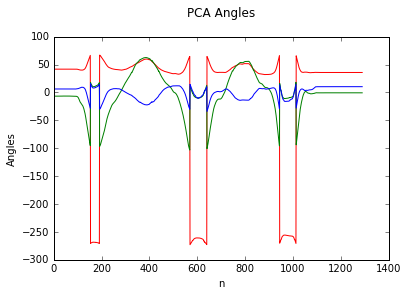

Coefficient first component [-0.33386392 -0.08459003  0.93881809]
Eigenvalues of the covariance matrix [ 11168.75014853   1161.48253017    113.40586131]
Percentage of explained signal for each component [ 89.75469765   9.33394623   0.91135612]


In [340]:
def PCA(A):
    """ performs principal components analysis 
     (PCA) on the n-by-p data matrix A
     Rows of A correspond to observations, columns to variables. 

    Returns :  
    coeff :
    is a p-by-p matrix, each column containing coefficients 
    for one principal component.
    score : 
    the principal component scores; that is, the representation 
    of A in the principal component space. Rows of SCORE 
    correspond to observations, columns to components.
    latent : 
    a vector containing the eigenvalues 
    of the covariance matrix of A.
    """
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-np.mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = np.linalg.eig(np.cov(M)) # attention:not always sorted
    score = np.dot(coeff.T,M).T # projection of the data in the new space
    return coeff,score,latent


coeff,score,latent = PCA(eulerAng)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(score[:,0],'r')
ax.plot(score[:,1],'g')
ax.plot(score[:,2],'b')
ax.set_xlabel('n')
ax.set_ylabel('Angles')
ax.set_title('PCA Angles\n')
plt.show() 
print 'Coefficient first component', coeff[:,0]
print 'Eigenvalues of the covariance matrix', latent
print 'Percentage of explained signal for each component', 100*latent/np.sum(latent)


angleData = score[:,0] - score[0,0]


### Get the data for the patient

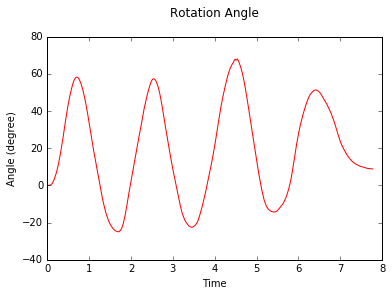

In [338]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df.time.values,angleData,'r')
ax.set_xlabel('Time')
ax.set_ylabel('Angle (degree)')
ax.set_title('Rotation Angle\n')

plt.show() 